<a href="https://colab.research.google.com/github/AshisRay/Mini-Project/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocess**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import os
datadir = '/content/drive/MyDrive/Python April'
categories = ['Aeroplane','Pants']
target = []
image = []
flat_data = []

for i in categories:
  class_num = categories.index(i)
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resize = resize(img_array,(150,150,3))
    flat_data.append(img_resize.flatten())
    image.append(img_resize)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
image = np.array(image)

# **Training**

In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [4]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [5]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

# **Evaluation**

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [7]:
accuracy_score(y_pred,y_test)

1.0

In [8]:
confusion_matrix(y_pred,y_test)

array([[11,  0],
       [ 0,  7]])

# **Prediction**

In [9]:
import pickle
pickle.dump(clf,open('model.p','wb'))

In [10]:
model = pickle.load(open('model.p','rb'))

Enter the URL here:https://www.cnet.com/a/img/V_fg99XR_kG3h0_lxxohkoSpaMA=/940x528/2019/05/01/5efb39d4-d9ce-41e2-ac09-46f6444ca761/british-airways-boeing-787.jpg
(528, 940, 3)
Output: Aeroplane


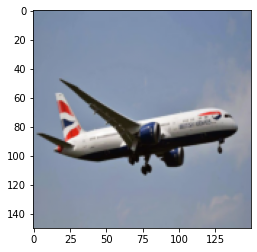

In [13]:
flat_data = []
url = input('Enter the URL here:')
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'Output: {y_out}')